<a href="https://colab.research.google.com/github/Anitesh123/Bike-Rental/blob/main/Bike_Sharing_Demand_Prediction_(2)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Project Name**    -Bike Sharing Demand Prediction




##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 - Vamsi Krishna**
##### **Team Member 2 - Anitesh Kumar**
##### **Team Member 3 - Moin Quraishi**

# **Project Summary -**

* First of all we were provided with a data set of City Seoul for bike rental. We 
studied dataset and got various columns as : - Date, Rented Bike Count, Hour,Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons,Holiday, Functioning Day.

* Then we started with exploratory data analysis. So we proceeded with looking for missing values and outlier detection and we fonud that there were no missing values in entire data set. And started finding for dupicates but there were no duplicates either.

* In the view of data wrangling we converted the date column into Day,  month and year as seperate column so we can have a closer view on the insigts. And changed days to weekdays and weekend days as 1 and 0, where we can evaluate on the basis of numeric values.

* After performing various exploratory data analysis we got the major insights as Rented Bike Count is our target Variable and we made various charts around this variable. And we found that on weekdays the demand is more compared to weekends as most of the customers are probably working professional. and there was a spike on bike rental count around 8 AM in the morning and 6 PM in the evening. And People generally prefer to bike at moderate to high temperatures. We see highest rental counts between 32 to 36 degree celcius

* Then we performed data hot encoding, Feature selection and data transformation for our dataset 
* Then After splitting the data into train and test, we started building our models and implementing on our train and test data, after this we used gridsearch cv for every model we build and got considerably good results.
* Finally we got our best model as XG_Boost_CV which gives best result out of all the models with Model_score, R2_scrore and Adjusted_R2_Scrore as 0.86, 0.84, 0.83 respectively.  

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Rental Bike Sharing is the process by which
bicycles are rented on several basis- hourly, weekly,
membership-wise, etc And bike
return is automated via a network of Booth locations
throughout a city. Using these systems, people are able rent a
bike from a one location and return it to a different place on
an as-needed basis.**
**Currently Rental bikes are introduced in many urban cities for the improvement of mobility and comfort. Now It is important to make the rental bike available and accessible to the public at the right
time as it reduces the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing the Necessary libraries and Modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor



### Dataset Loading

In [ ]:
# Load Dataset
# Mounting the Google Drive
# drive.mount('/content/drive')
df = pd.read_csv('/content/SeoulBikeData.csv',encoding='unicode_escape')


### Dataset First View

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<AxesSubplot:>

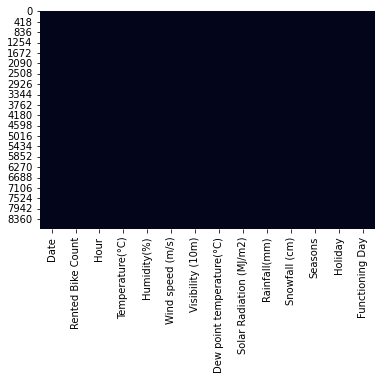

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given contains data of Rental Bike Demand from South Korean
city of Seoul, comprising of climatic variables like
Temperature, Humidity, Rainfall, Snowfall, Dew Point
Temperature, and others. We have to analyse how different factors in our dataset are related to our target variable . The goal is to understand and predict the number of bikes which should be available on hourly basis.   
The above dataset has 8760 rows and 14 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 


* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Replacing the column names spaces with '_'.
df.columns=df.columns.str.replace(' ','_')
df

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Write your code to make your dataset analysis ready.
# convert the 'Date' column to datetime format
#Inserting Day, Month, Year by extracting from Date Feature.
df['Date']= pd.to_datetime(df['Date'])
df['Year']= pd.to_datetime(df['Date']).dt.year
df['Month']= pd.to_datetime(df['Date']).dt.month
df['Day']=df['Date'].dt.day_name()
df

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,Year,Month,Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday


In [ ]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
df['Weekdays_or_weekend']=df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

df.drop(['Date','Day'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented_Bike_Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind_speed_(m/s)           8760 non-null   float64
 5   Visibility_(10m)           8760 non-null   int64  
 6   Dew_point_temperature(°C)  8760 non-null   float64
 7   Solar_Radiation_(MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall_(cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning_Day            8760 non-null   object 
 13  Year                       8760 non-null   int64

### What all manipulations have you done and insights you found?

1. Modified the Column names for better usage.
2. Converted Date column to Year, month and date for having a clear understanding and to visualise better.
3. Encoded Weekdays as 0 and weekends as 1 seperately.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  

In [ ]:
#Getting the numerical features from data
numeric_features = df.describe().columns
numeric_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility_(10m)', 'Dew_point_temperature(°C)',
       'Solar_Radiation_(MJ/m2)', 'Rainfall(mm)', 'Snowfall_(cm)', 'Year',
       'Month', 'Weekdays_or_weekend'],
      dtype='object')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

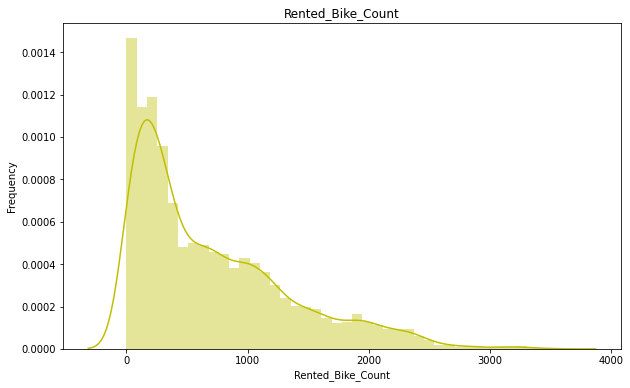

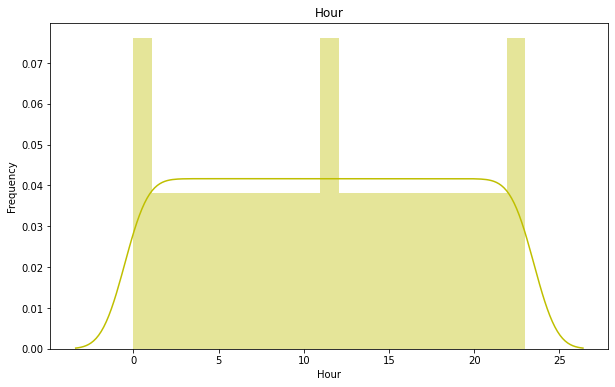

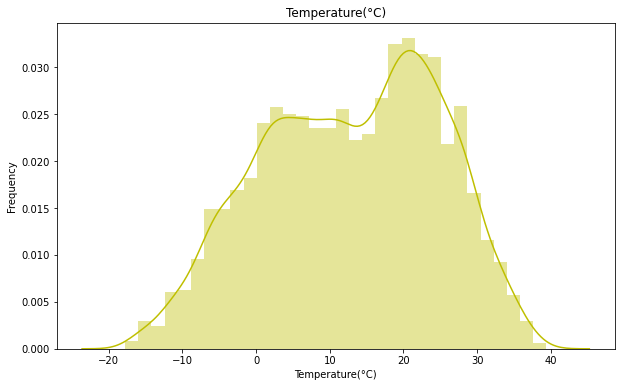

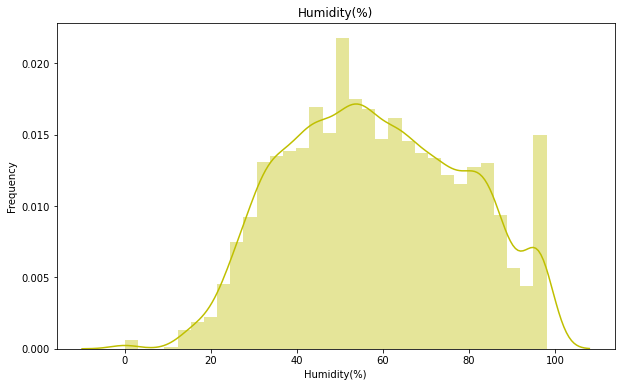

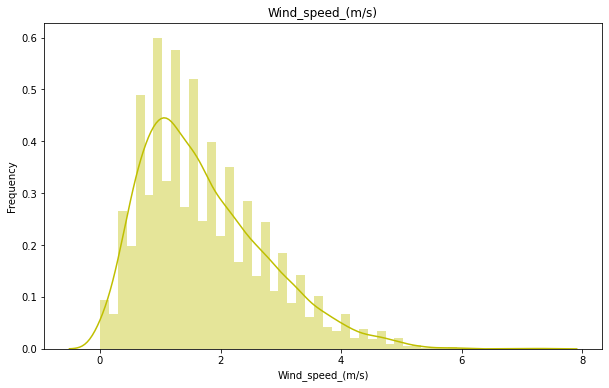

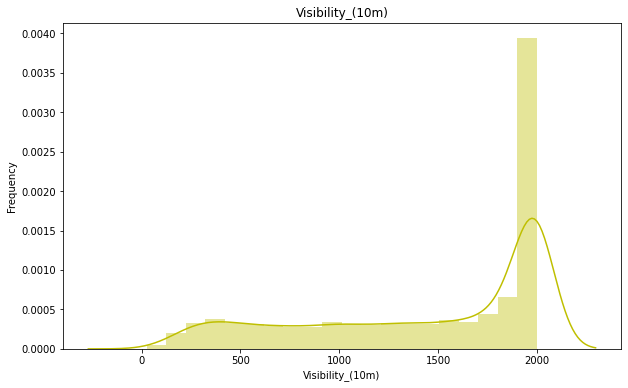

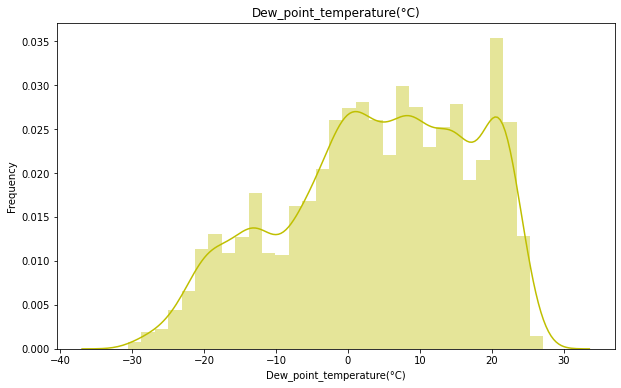

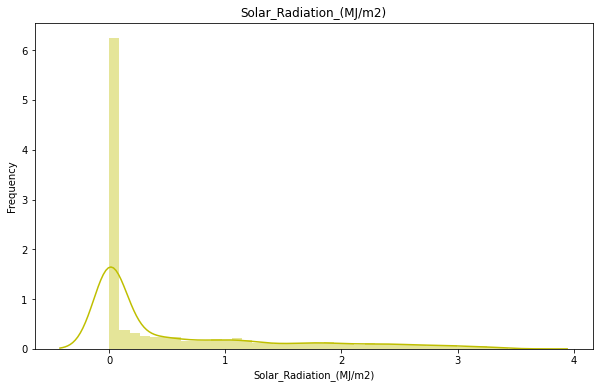

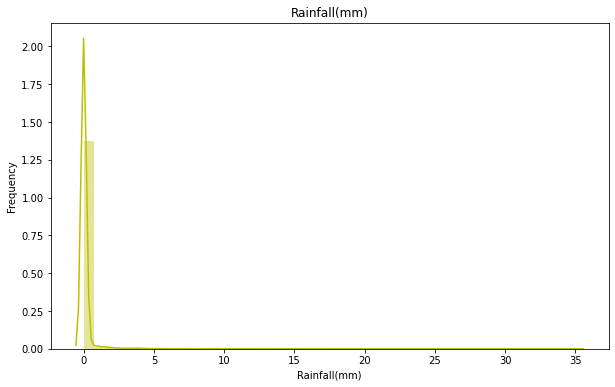

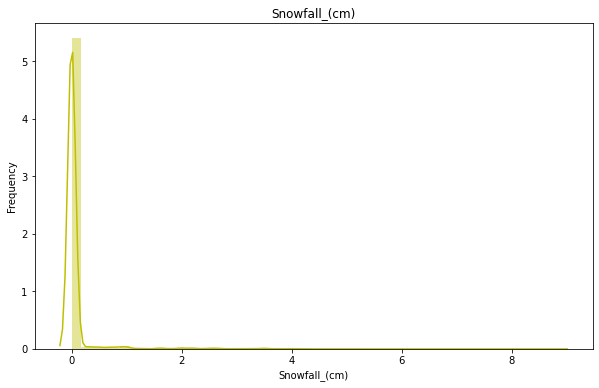

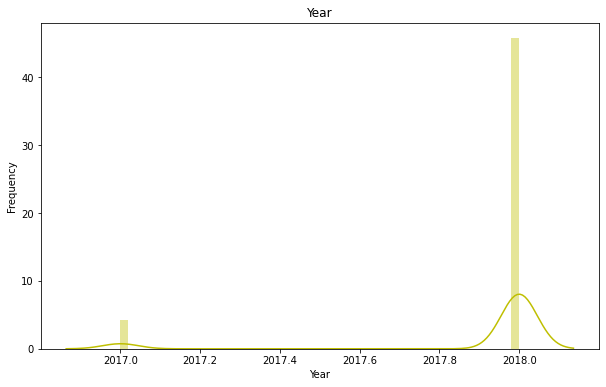

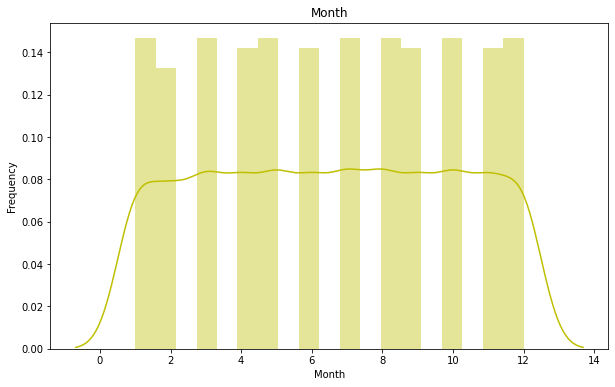

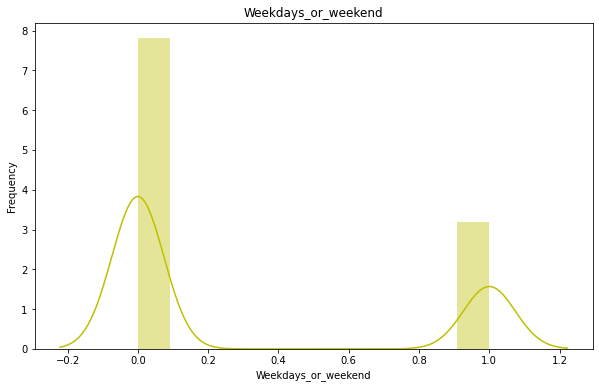

In [ ]:
# Chart - 1 visualization code 
# Plotting Numeric features from data in distribution plot 
for col in numeric_features[:]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature,color="y")
    plt.ylabel('Frequency')    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

We choose Distribution plot to visualise the distribution of data points, from which we can see how the data points are distributed through out the given data. 

##### 2. What is/are the insight(s) found from the chart?

We got different charts for each numeric features, here we can see our target variable Rented_bike_count is right skewed which we have to transform it so that it will increase our accuracy in regression   

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insight are for our understanding of data distribution so that we can modify if needed to get the better results in our regression model

#### Chart - 2

<AxesSubplot:xlabel='Seasons', ylabel='Rented_Bike_Count'>

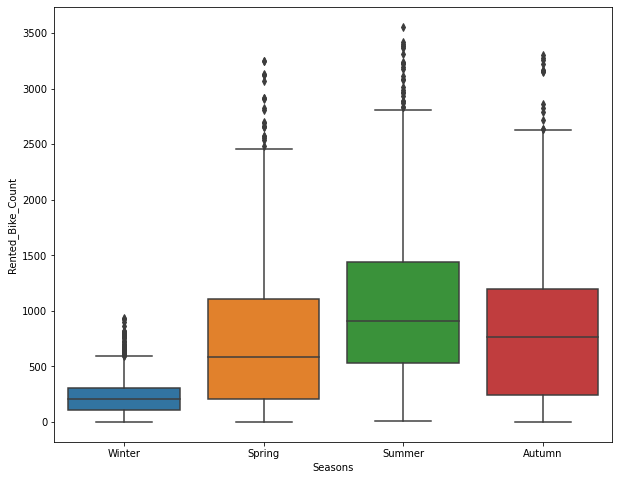

In [ ]:
# Chart - 2 visualization code
# Plotting the Categorical Features against rented_bike_count

plt.figure(figsize=(10,8))
sns.boxplot(x="Seasons",y='Rented_Bike_Count',data=df) 

##### 1. Why did you pick the specific chart?

For Compairing a bivariate plot, Box plot is pretty easy to understand as it contains the mean and can notice the outliers eaisly. And when the categorical variable have less features it become more easy.       

##### 2. What is/are the insight(s) found from the chart?

Form the above three visualisations we can see in the plot of Seasons and rented_bike_count for summer season the mean has a higher value as compared to other seasons, and winter has the lowest mean value. This tell us that in summer season the demand for renting bike is very high for which we have to make a stable supply. And in winter Season the demand is very less as most peoples prefer to travel by cars.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this can make a positive business impact as for summer season if the company has a stable supply of the bikes and make less waiting time for customers this will built a trust among the them. 

#### Chart - 3

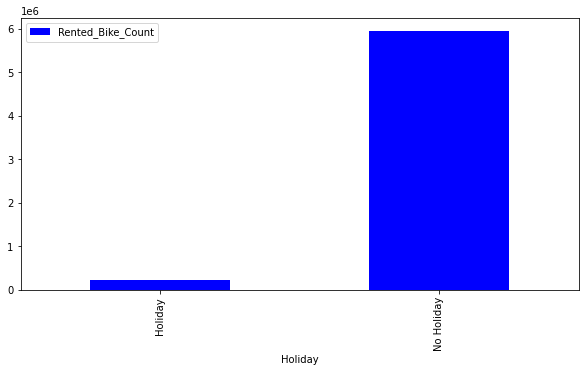

In [ ]:
# Chart - 3 visualization code
# plt.figure(figsize=(10,7))
# sns.borplot(x="Holiday",y='Rented_Bike_Count', data=df)
fig2=df.groupby(['Holiday'])['Rented_Bike_Count'].sum().reset_index()
fig2.plot(x='Holiday',kind='bar',figsize=(10,5),color='Blue')
plt.show()

##### 1. Why did you pick the specific chart?

As we see that Bar plot is easier to compare between the values, for a bivariate plot it is preety handy.

##### 2. What is/are the insight(s) found from the chart?

In the above visualisation we can see on comparing a holiday with non-holiday days the count of rented bikes are way more higher on a non-holiday which means customers which are renting bikes on daily basis are mostly working professionals or students.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, If we see from the business point of view it will create a positive impact as the company can be ready for non-holiday days to have a stable supply of bikes. 

#### Chart - 4

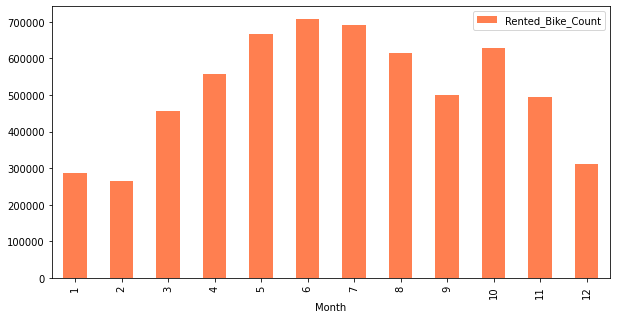

In [ ]:
# Chart - 4 visualization code
#Visualizing the Bike Rentals against the Months
fig2=df.groupby(['Month'])['Rented_Bike_Count'].sum().reset_index()
fig2.plot(x='Month',kind='bar',figsize=(10,5),color='coral')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. We have taken months of a year which gives us a clear view for value counts. 

##### 2. What is/are the insight(s) found from the chart?

On the month of May, June, July and August got a pretty high value counts for rented bikes as comparing other months, Around 600000 and above bikes were rented from May to August and Octuber  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes as it shows the demand of bikes are higher on these months the company should have a stable supply and be ready for fullfiling the demand and have a good customer experience. 

#### Chart - 5

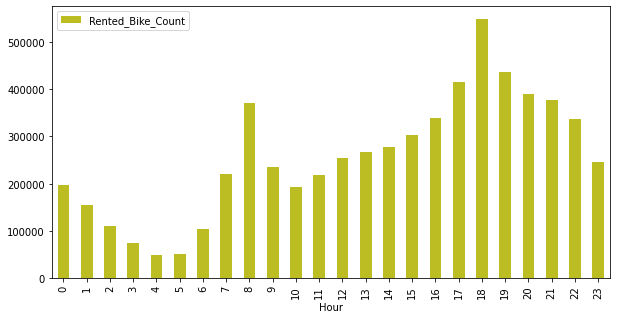

In [ ]:
# Chart - 5 visualization code
fig3=df.groupby(['Hour'])['Rented_Bike_Count'].sum().reset_index()
fig3.plot(x='Hour',kind='bar',figsize=(10,5),color='#bcbd22')
plt.show()


##### 1. Why did you pick the specific chart?

So bar chart is really easy to analyse when we have not much features to visualise, Here Hours of a day and rented_bike_count are taken.

##### 2. What is/are the insight(s) found from the chart?

With the help of above Visulaization, at Morning 8:00AM there is a huge spike, which we can consider as most of the bikes are rented by fitness enthusiast or working professional who goes to work or students who go for colleges or school then from 9:00AM the number of Bike rentals are increasing gradually and are maximum at 6:00 PM then decreasing gradually.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this will also help in creating a positive business impact by giving the time of the day when most of the customers are renting bikes and can plan accrodingly the demand and supply of bikes. and at times midnight they can recover the bikes from the locations where customers have left them.

#### Chart - 6

<AxesSubplot:xlabel='Hour', ylabel='Rented_Bike_Count'>

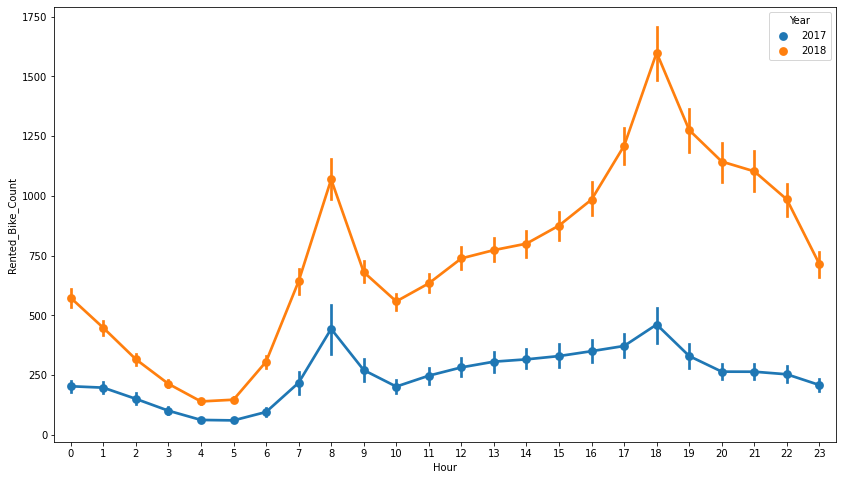

In [ ]:
# Chart - 6 visualization code
#Visualizing the Bike Rentals against the Years
plt.figure(figsize=(14,8))
sns.pointplot(x=df["Hour"],y=df['Rented_Bike_Count'],hue=df['Year'])


##### 1. Why did you pick the specific chart?

So We choose point plot as it is very specific for points where we can get the right insights from this graph, for getting the trend of rented bike count it is suitable and easy to understand. 

##### 2. What is/are the insight(s) found from the chart?

Here we can see that for the Year 2017 the value counts for rented bikes are very less, it is newly launched company on 2017 where the people where not aware about this renting bike. Or the data we have contains very less from year 2017.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will not help for creating a positive business impact but can see that from the year 2017 there is a huge growth of the company.

#### Chart - 7


<AxesSubplot:xlabel='Hour', ylabel='Rented_Bike_Count'>

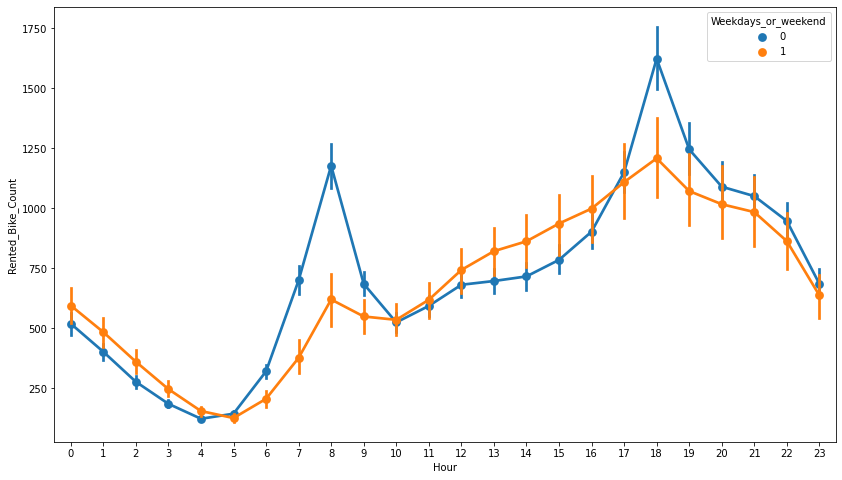

In [ ]:
plt.figure(figsize=(14,8))
sns.pointplot(x=df["Hour"],y=df['Rented_Bike_Count'],hue=df['Weekdays_or_weekend'])

##### 1. Why did you pick the specific chart?

So We choose point plot as it is very specific for points where we can get the right insights from this graph, for getting the trend of rented bike count on weekdays and weekends it is suitable and easy to understand.

##### 2. What is/are the insight(s) found from the chart?


From this graph we can take the learning that Bikes are rented mostly for Morning/Evening commutes on Weekdays, and mostly Daytime rides on Weekends.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes by considering this insight company should have an idea that they have to make a suitable supply on which time of the day for weekdays and weekends. 

#### Chart - 8

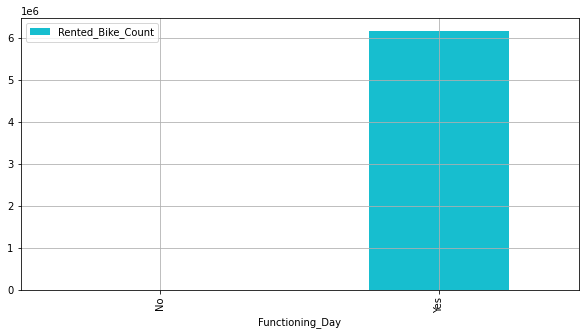

In [ ]:
# Chart - 7 visualization code
fig6=df.groupby(['Functioning_Day'])['Rented_Bike_Count'].sum().reset_index()
fig6.plot(x='Functioning_Day',kind='bar',figsize=(10,5),color='#17becf',grid='box')
plt.show()

##### 1. Why did you pick the specific chart?

There is very less feature in above visualization so we choose bar graph to represent this.

##### 2. What is/are the insight(s) found from the chart?

We can see that on a non-functioning day the count of renting bikes is almost zero, means there is no demand of bikes for non-functioning day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

When there is a non-functioning day as there is almost zero demand the business can use its time or work for having growth strategies which will imapct business with high end functioning.  

#### Chart - 9

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented_Bike_Count'>

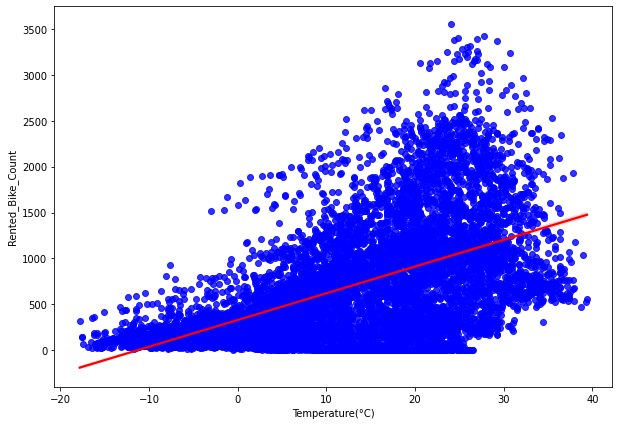

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10,7))
sns.regplot(df['Temperature(°C)'], df['Rented_Bike_Count'],scatter_kws={"color": "Blue"}, line_kws={"color": "red"})

##### 1. Why did you pick the specific chart?

Here we tried out regression plot for a numerical feature to check the dependancy of the numerical variable with respect to our target variable. 

##### 2. What is/are the insight(s) found from the chart?

The Target variable here is Rented bike count and it is positively linear to Temperature. But if we see this technically and logically this will be linear upto a certain temperatuer and then it will go down , as at high temperature people would not prefer to go on a rental bike.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this can be helpfull as the business can learn from this is most scattered part of the plot is between 10 to 30 degree celcius which means if the temperature of the day lies in between this range they will have high demand of bikes rather than in days where temperature is above or below from this range.

#### Chart - 10

<AxesSubplot:xlabel='Rainfall(mm)', ylabel='Rented_Bike_Count'>

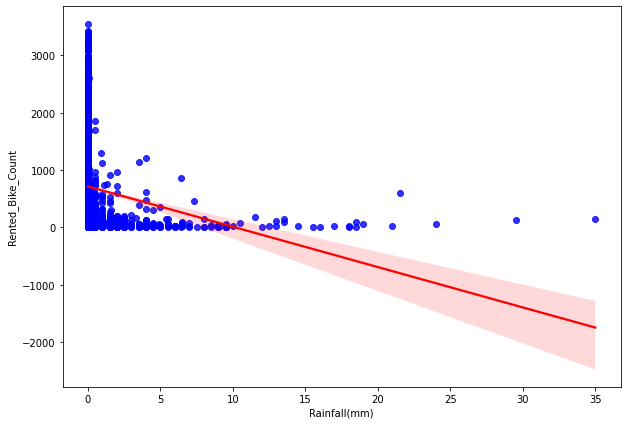

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10,7))
sns.regplot(df['Rainfall(mm)'], df['Rented_Bike_Count'],scatter_kws={"color": "Blue"}, line_kws={"color": "red"})

##### 1. Why did you pick the specific chart?

Here we tried out regression plot for a numerical feature that is Rainfall in mm to check the dependancy of the numerical variable with respect to our target variable. 

##### 2. What is/are the insight(s) found from the chart?

Here we can see that our target variable is negatively linear with the numerical featuer Rainfall that means when there is rainfall less than 2 or 3 mm then the demand of bikes will be considerably high rather when the rainfall reach 5mm or more.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes Having less rainfall or zero rainfall they can expect to have high demand as compared to when there is heavy rainfall which is more than 5 mm. 

#### Chart - 11

<AxesSubplot:xlabel='Wind_speed_(m/s)', ylabel='Rented_Bike_Count'>

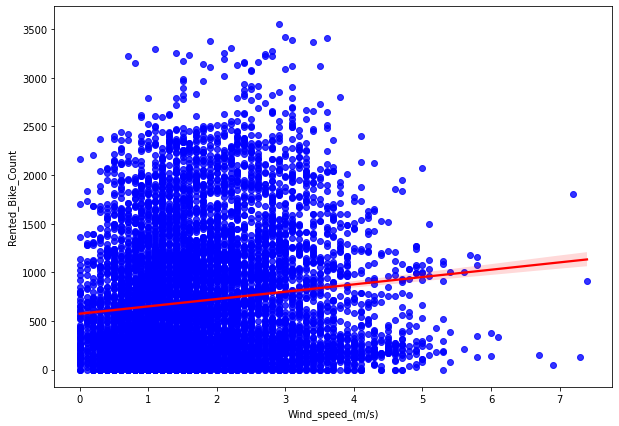

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(10,7))
sns.regplot(df['Wind_speed_(m/s)'],df['Rented_Bike_Count'],scatter_kws={"color": "Blue"},line_kws={"color":"red"})

##### 1. Why did you pick the specific chart?

Here we tried out regression plot for a numerical feature that is Wind Speed in  to check the dependancy of the numerical variable with respect to our target variable.

##### 2. What is/are the insight(s) found from the chart?

In this distribution the data
points scattered around the Wind Speed lying
between 0-5 m/s. However, the distribution starts to fade
around 6m/s.These points would be considered as outliers for our linear
regression model.

#### Chart - 12

<AxesSubplot:xlabel='Weekdays_or_weekend', ylabel='Rented_Bike_Count'>

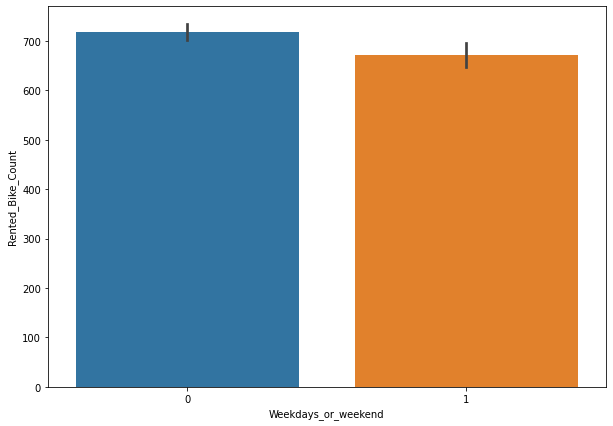

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(10,7))
sns.barplot(x='Weekdays_or_weekend',y='Rented_Bike_Count',data=df)

##### 1. Why did you pick the specific chart?

For a bivariate numerical feature bar plot shows easy undertanding of the features currently using in this dataset

##### 2. What is/are the insight(s) found from the chart?

From this plot we can see a slight difference in the demand of bikes as 0 is given to Weekdays and 1 for weekends hence considerably weeksdays have high demand for renting bikes as compared to weekends, we can say mostly the bikes rented are working professional. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

On weekdays the business should maintain a stable supply giving valuable service to their fellow customers.

#### Chart - 13 - Correlation Heatmap

<AxesSubplot:>

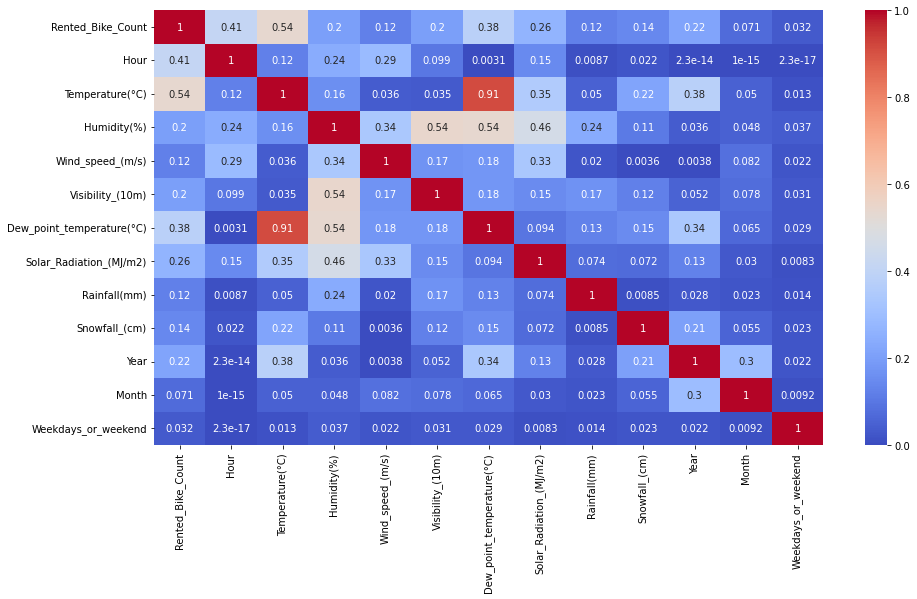

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Using a correlation Heat Map we can easily identify the relationship between different numerical featureas how much they are correlated to each other from their correlation coefficient. A correlation matrix is used to summarize data, as an input into a more advanced analysis. 

##### 2. What is/are the insight(s) found from the chart?

Form above correlation heat map we can see that Temperature and Dew point Temperature have a correlation coefficient of .91 which is positively correlated
to each other,rest all also positively correlated but dosen't have a higher value.

#### Chart - 14 - Pair Plot 

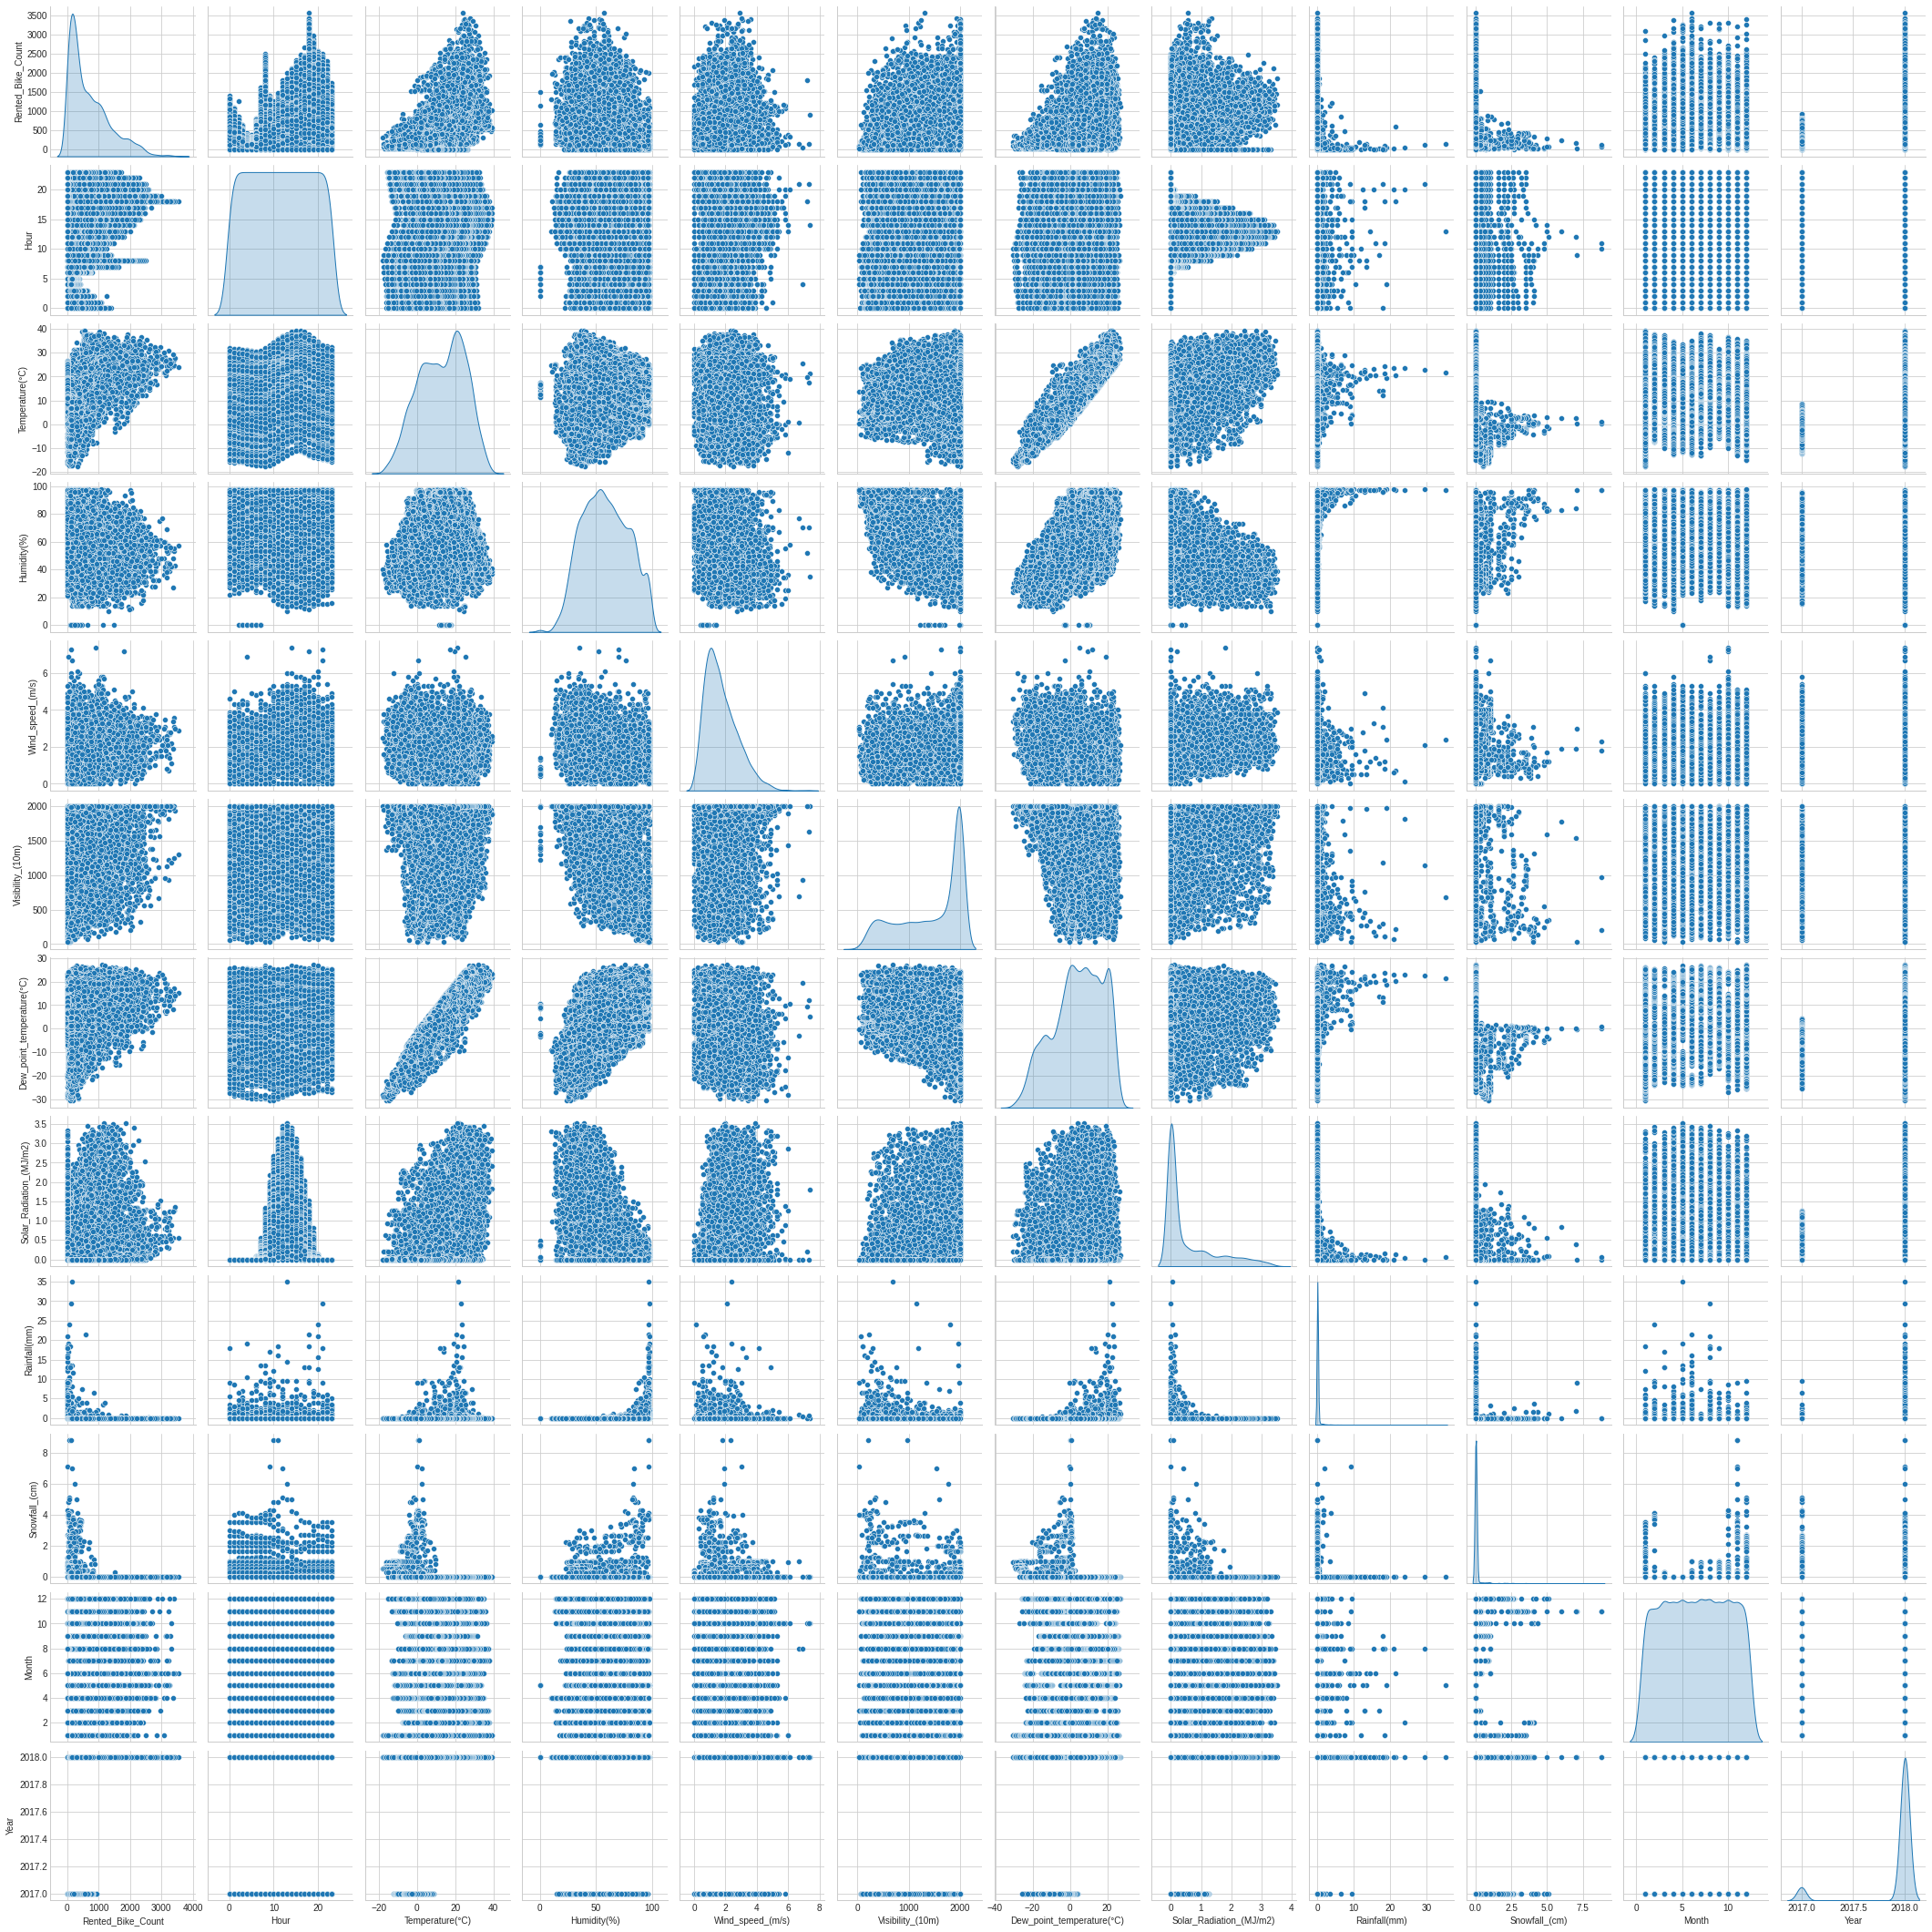

In [ ]:
# Pair Plot visualization code
data=df[['Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility_(10m)', 'Dew_point_temperature(°C)',
       'Solar_Radiation_(MJ/m2)', 'Rainfall(mm)', 'Snowfall_(cm)','Month','Year']]
plt.style.use('seaborn-whitegrid')
sns.pairplot(data, diag_kind='kde')
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand set of features to explain the relationship between two variables. It is similar to correlation heat map but the representation is in graphical.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can see that most of the variable are not linearly seperable only for the data point Temperature and dew point temperature these two are linearly seperable. Temperature and dew point temperature these two have a high correlation value too. 

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

<AxesSubplot:>

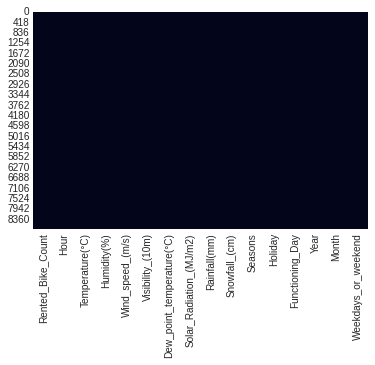

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
df.isnull().sum()

# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
dataset=df.copy()
dataset['Hour'].nunique()

24

In [ ]:
# Creating a function for Hour Column in to convert into a categorical feature
def Hour_Mod(x):
  if x<6: 
    return '1sthalf'
  elif x<12: 
    return '2ndhalf'
  elif x<18: 
    return '3rdhalf'
  else: 
    return '4thhalf'
#Creating New column Hour_Mod and apply the function
dataset['Hour_Mod']=dataset.Hour.apply(lambda x:Hour_Mod(x))
#Dropping Hour Column 
dataset.drop('Hour',axis=1,inplace=True)
dataset

,Rented_Bike_Count,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,Year,Month,Weekdays_or_weekend,Hour_Mod
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0,1sthalf
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0,1sthalf
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0,1sthalf
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0,1sthalf
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0,1sthalf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,0,4thhalf
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,0,4thhalf
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,0,4thhalf
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,0,4thhalf


In [ ]:
dataset['Hour_Mod'].nunique()

4

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have created a function which convert the hour column into a categorical feature by dividing 24 Hours of a day in 4 quater, we have used this technique as it is easy to apply and convert the data

In [ ]:
# One hot encoding
dataset = pd.get_dummies(dataset, columns=["Seasons", "Holiday","Functioning_Day",'Month','Hour_Mod'], prefix=["Season", "Holiday","Function",'Month','Hour_Mod'],drop_first=True)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented_Bike_Count          8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind_speed_(m/s)           8760 non-null   float64
 4   Visibility_(10m)           8760 non-null   int64  
 5   Dew_point_temperature(°C)  8760 non-null   float64
 6   Solar_Radiation_(MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall_(cm)              8760 non-null   float64
 9   Year                       8760 non-null   int64  
 10  Weekdays_or_weekend        8760 non-null   int64  
 11  Season_Spring              8760 non-null   uint8  
 12  Season_Summer              8760 non-null   uint8  
 13  Season_Winter              8760 non-null   uint8

### 4. Feature Manipulation & Selection

In [ ]:
# Select your features wisely to avoid overfitting
#Creating the list of Predictor Variables after Data Encoding and dropping features which are higlhy correlated 
features=[i for i in dataset.columns if i not in ['Rented_Bike_Count','Dew_point_temperature(°C)','Year']]

features

['Temperature(°C)',
 'Humidity(%)',
 'Wind_speed_(m/s)',
 'Visibility_(10m)',
 'Solar_Radiation_(MJ/m2)',
 'Rainfall(mm)',
 'Snowfall_(cm)',
 'Weekdays_or_weekend',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter',
 'Holiday_No Holiday',
 'Function_Yes',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12',
 'Hour_Mod_2ndhalf',
 'Hour_Mod_3rdhalf',
 'Hour_Mod_4thhalf']

##### What all feature selection methods have you used  and why?

Here we have created a list of features by list comprehension method by going through all the columns and left on Rental_Bike_Count as it is our Target Variable.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


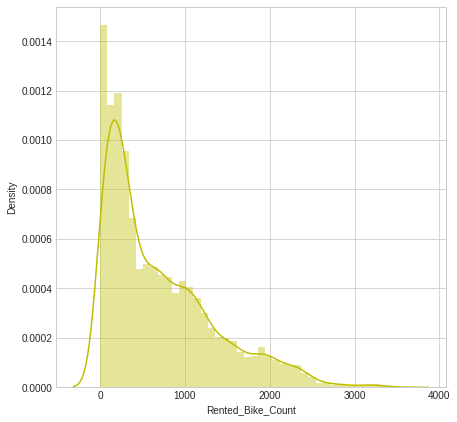

In [ ]:
# Transform Your data
#Plotting the Target Variable for knowing it's distribution.
# Dependent variable is 'Rented_Bike_Count'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented_Bike_Count'],color="y")
plt.show()


Target variable is Positively skewed(or) Right skewed.
So for transforming to Gaussian/Normal distribution, we will check by applying follwing Transformations.


1. Log Transfomartion
2. Square root Transformation
3. Inverse Transfomation



/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

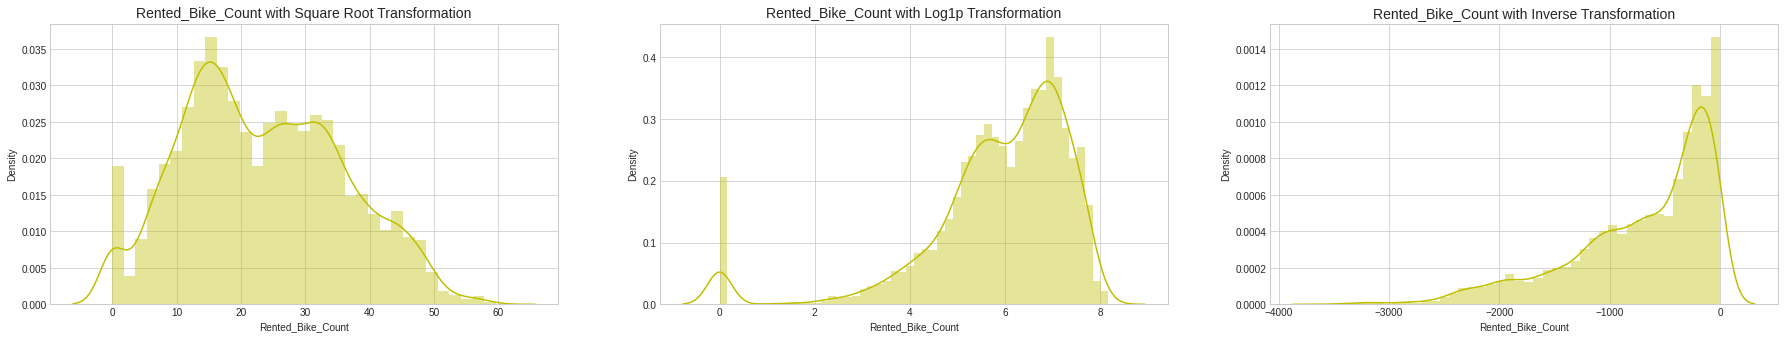

In [ ]:
#Applying the Squreroot Tranformation for checking the the distribution of Target variable.
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.distplot(np.sqrt(df['Rented_Bike_Count']),color="y")
plt.title("Rented_Bike_Count with Square Root Transformation",fontsize=14)

#Applying the Log Tranformation for checking the the distribution of Target variable.
plt.subplot(1,3,2)
sns.distplot(np.log1p(df['Rented_Bike_Count']),color="y")
plt.title("Rented_Bike_Count with Log1p Transformation",fontsize=14)
#Applying the Inverse Tranformation for checking the the distribution of Target variable.
plt.subplot(1,3,3)
sns.distplot(np.invert(df['Rented_Bike_Count']),color="y")
plt.title("Rented_Bike_Count with Inverse Transformation",fontsize=14)
plt.subplots_adjust(left=0.1,bottom=0.1,right=2.5)
plt.show()

Here we see that after transforming our data by using three different  transformation, square root transformation makes the positively skewed distribution a normal distribution. 

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Splitting the dataset for Training and Testing the model.
X = dataset[features] 
#Applying Squareroot transformation on our Target Variable
y = np.sqrt(dataset['Rented_Bike_Count'])
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(7008, 27)
(1752, 27)


##### What data splitting ratio have you used and why? 

We have used 8:2 as the splitting  ratio as 20% for test and 80% for train, at start we have used this as base for training and testing,  afterward we will tune the parameters for getting better result. 

## ***7. ML Model Implementation***

### ML Model - 1 - Random Forest Regressor

Random_Forest_Regressor Model Score is: 0.96
MSE : 86836.38
RMSE : 294.68
R-Square Score : 0.793
Adjusted_R2_Score: 0.789


Text(0, 0.5, 'Actual')

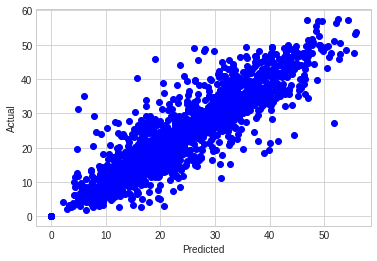

In [ ]:

# create regressor object
rfr = RandomForestRegressor(n_estimators = 4, random_state = 0)
  
# # Fitting Random Forest Regression with x and y data
rfr.fit(X_train, y_train)
RFR_score=rfr.score(X_train,y_train)
print("Random_Forest_Regressor Model Score is:", round(RFR_score,2) )
y_pred=rfr.predict(X_test)
#calculating Mean Square Error
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , round(MSE,2))
#calculating Root Mean Square Error
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,2))
#calculating R-Square score
R2=r2_score((y_test)**2, (y_pred)**2)
print("R-Square Score :", round(R2,3))
Adjusted_R2_Score =(1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print(f"Adjusted_R2_Score: {(Adjusted_R2_Score):.3f}")

#Ploting the Actual/Predicted For Random Forest Regressor
plt.scatter(y_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
#Creating Comparision table for the better understanding of evaluation metrics
Model_comparision_CV=pd.DataFrame(index =['MSE','RMSE','Model_score','R2_score','Adjusted_R2_Score'])

In [ ]:
#Updateing the Model_comparision_CV with score metrics of Random Forest Regressor
Model_comparision_CV['Random_Forest']=[MSE,RMSE,RFR_score,R2,Adjusted_R2_Score]
Model_comparision_CV

,Random_Forest
MSE,86836.375456
RMSE,294.680124
Model_score,0.962795
R2_score,0.792517
Adjusted_R2_Score,0.789267


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# create regressor object
RFR_CV = RandomForestRegressor( random_state = 0)
param = {'n_estimators':[2,4,5,7,10],
              'min_samples_leaf':[6,4,2],
              'max_depth' : [30,20,25],
              'min_samples_split': [30,25,20]
              }          
RFR_CV = GridSearchCV(estimator = RFR_CV, param_grid= param,refit=True,cv = 5,n_jobs=-1,verbose=4 )               
# # Fitting Random Forest Regression with x and y data
RFR_CV.fit(X_train, y_train)
RFR_score=RFR_CV.score(X_train,y_train)
print("Random_Forest_Regressor Model Score is:", round(RFR_score,2) )
y_pred=RFR_CV.predict(X_test)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Random_Forest_Regressor Model Score is: 0.92


In [ ]:
print(f'The best parameters for Random Forest Regressor are :',RFR_CV.best_params_)
print(f'The best estimator for Random Forest Regressor are :',RFR_CV.best_estimator_)
print(f'The best score for Random Forest Regressor are :',RFR_CV.best_score_*100)

The best parameters for Random Forest Regressor are : {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 10}
The best estimator for Random Forest Regressor are : RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=20,
                      n_estimators=10, random_state=0)
The best score for Random Forest Regressor are : 84.66684760229795


In [ ]:
#calculating Mean Square Error
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , round(MSE,2))
#calculating Root Mean Square Error
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,2))
#calculating R-Square score
R2_score=r2_score((y_test)**2, (y_pred)**2)
print("R-Square Score :", round(R2_score,3))
Adjusted_R2_Score =(1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print(f"Adjusted_R2_Score: {(Adjusted_R2_Score):.3f}")

MSE : 78596.35
RMSE : 280.35
R-Square Score : 0.812
Adjusted_R2_Score: 0.809


In [ ]:
#Updateing the Model_comparision_CV with the Ridge Regressor Metric Values after cross validation
Model_comparision_CV['Random_Forest_CV']=[MSE,RMSE,RFR_CV.best_score_,R2_score,Adjusted_R2_Score]

### ML Model - 2 - Support Vector Regressor

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

SVR Score : 80.25
MSE : 110666.66
RMSE : 332.67
R-Square Score : 0.736
Adjusted_R2_Score: 0.731


Text(0, 0.5, 'Actual')

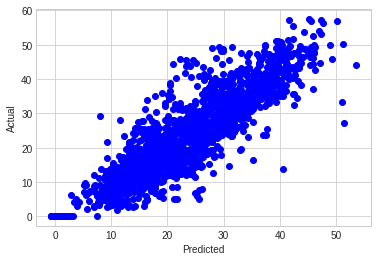

In [ ]:
#Initializing Support Vector Regressor
svr = SVR(kernel = 'rbf') 
#Fitting Data to the model
svr.fit(X_train, y_train)
#Calcularing the training score
SVR_score=svr.score(X_train, y_train)
print(f'SVR Score :',round(SVR_score*100,2))
#Predicting on the test dataset
y_pred=svr.predict(X_test)
#calculating Mean Square Error
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , round(MSE,2))
#calculating Root Mean Square Error
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,2))
#calculating R-Square score
R2=r2_score((y_test)**2, (y_pred)**2)
print("R-Square Score :", round(R2,3))
Adjusted_R2_Score =(1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print(f"Adjusted_R2_Score: {(Adjusted_R2_Score):.3f}")

#Ploting the Actual/Predicted 
plt.scatter(y_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
Model_comparision_CV['svr']=[MSE,RMSE,SVR_score,R2,Adjusted_R2_Score]
pd.DataFrame(Model_comparision_CV['svr'])


,svr
MSE,110666.662919
RMSE,332.665993
Model_score,0.802475
R2_score,0.735578
Adjusted_R2_Score,0.731437


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#initializing the Parameters
param = {'kernel' : ['rbf'],'C' : [1,5,10],'gamma' : [0.01,0.1,1]}
SVR_CV=GridSearchCV (estimator=SVR(),param_grid = param,n_jobs = -1,refit=True ,verbose = 4,cv=5)

# Fit the Algorithm
SVR_CV.fit(X_train,y_train)

#Getting the best results from gridsearch
print(f'The best parameters fro SVR are :', SVR_CV.best_params_)
print(f'The best estimator for SVRegressor is:', SVR_CV.best_estimator_)
print(f'SVR Best Score :',round(SVR_CV.best_score_*100,2))


# Predict on the model

#Predicting on the test dataset
y_pred=SVR_CV.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best parameters fro SVR are : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
The best estimator for SVRegressor is: SVR(C=10, gamma=0.1)
SVR Best Score : 83.75


MSE : 77818.09
RMSE : 278.96
R-Square Score : 0.814
Adjusted_R2_Score: 0.811


Text(0, 0.5, 'Actual')

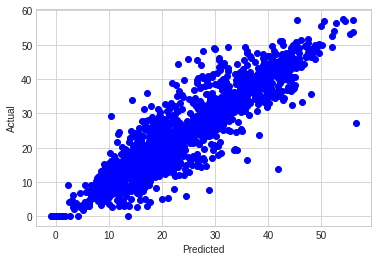

In [ ]:
#calculating Mean Square Error
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , round(MSE,2))
#calculating Root Mean Square Error
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,2))
#calculating R-Square score
R2_score=r2_score((y_test)**2, (y_pred)**2)
print("R-Square Score :", round(R2_score,3))
Adjusted_R2_Score =(1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print(f"Adjusted_R2_Score: {(Adjusted_R2_Score):.3f}")

#Ploting the Actual/Predicted For Support Vector Regressor
plt.scatter(y_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
Model_comparision_CV['SVR_CV']=[MSE,RMSE,SVR_CV.best_score_,R2_score,Adjusted_R2_Score]
Model_comparision_CV

,Random_Forest,Random_Forest_CV,svr,SVR_CV
MSE,86836.375456,78596.351224,110666.662919,77818.089216
RMSE,294.680124,280.350408,332.665993,278.958938
Model_score,0.962795,0.846668,0.802475,0.837484
R2_score,0.792517,0.812205,0.735578,0.814065
Adjusted_R2_Score,0.789267,0.809264,0.731437,0.811153


### ML Model - 3 - XG Boost Regressor

XGB Model Score is:  95.49
MSE : 73269.53
RMSE : 270.68
R-Square Score : 0.825
Adjusted_R2_Score: 0.822


Text(0, 0.5, 'Actual')

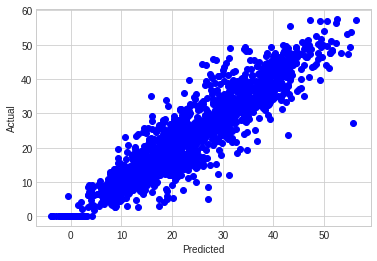

In [ ]:
# ML Model - 3 Implementation
#Initializing XGB Refressor
xgb = xgb.XGBRegressor(verbosity=0)

#Fitting the data to the XGB model
xgb.fit(X_train, y_train)

#predicting the data on testing data set
y_pred=xgb.predict(X_test)
XGB_score= xgb.score(X_train,y_train)*100
print("XGB Model Score is: ",round(XGB_score,2))

#calculating Mean Square Error
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , round(MSE,2))

#calculating Root Mean Square Error
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,2))

#calculating R-Square score
R2=r2_score((y_test)**2, (y_pred)**2)
print("R-Square Score :", round(R2,3))
Adjusted_R2_Score =(1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print(f"Adjusted_R2_Score: {(Adjusted_R2_Score):.3f}")

#Ploting the Actual/Predicted For XG Boost Regressor
plt.scatter(y_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [ ]:
Model_comparision_CV['xgb']=[MSE,RMSE,XGB_score,R2,Adjusted_R2_Score]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Parameters intialization for XGBoost Regressor
'''params = {
          'n_estimators': [100,200,500],
          'max_depth':[3,6,9], 
          'learning_rate': [0.01,0.1,1], 
          'gamma': [0.01,0.1]  
         }'''
#The parameters after Hyperparameters tuning using Cross Validation are considerd as final.
params = {
          'n_estimators': [200], 
          'max_depth':[9], 
          'learning_rate': [0.1], 
          'gamma': [0.1]  
          }
#creating XGB Regessor CV model
XGB_CV= GridSearchCV( estimator = xgb,param_grid=params,scoring=['r2','neg_root_mean_squared_error'],refit='r2',cv=5,verbose=4)
XGB_CV.fit(X_train, y_train)
print(f'The best parameters for XGBRegressor are :', XGB_CV.best_params_)
print(f'The best estimators for XGBRegressor are :',XGB_CV.best_estimator_)
print(f'The best score for XGBRegressor are :',XGB_CV.best_score_*100)

#Predicting on Test Dataset
y_pred=XGB_CV.predict(X_test)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-4.414) r2: (test=0.868) total time=   3.0s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-4.434) r2: (test=0.875) total time=   3.0s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-4.502) r2: (test=0.863) total time=   4.9s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-4.543) r2: (test=0.870) total time=   2.9s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-4.638) r2: (test=0.865) total time=   2.9s
The best parameters for XGBRegressor are : {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}
The best estimators for XGBRegressor are : XGBRegressor(bas

In [ ]:
#calculating Mean Square Error  
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , round(MSE,2))
#calculating Root Mean Square Error
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,2))
#calculating R-Square score
R2_score=r2_score((y_test)**2, (y_pred)**2)
print("R-Square Score :", round(R2_score,3))
Adjusted_R2_Score =(1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print(f"Adjusted_R2_Score: {(Adjusted_R2_Score):.3f}")

MSE : 66811.57
RMSE : 258.48
R-Square Score : 0.84
Adjusted_R2_Score: 0.838


In [ ]:
Model_comparision_CV['XGBoost_CV']=[MSE,RMSE,XGB_CV.best_score_,R2_score,Adjusted_R2_Score]
Model_comparision_CV

,Random_Forest,Random_Forest_CV,svr,SVR_CV,xgb,XGBoost_CV
MSE,86836.375456,78596.351224,110666.662919,77818.089216,73269.530376,66811.570423
RMSE,294.680124,280.350408,332.665993,278.958938,270.683451,258.479342
Model_score,0.962795,0.846668,0.802475,0.837484,95.492770,0.868238
R2_score,0.792517,0.812205,0.735578,0.814065,0.824933,0.840363
Adjusted_R2_Score,0.789267,0.809264,0.731437,0.811153,0.822191,0.837863


# **Conclusion**

Data Exploration Conclusions
In this project, we explored several types of informations that influence bike rental count. Below is a quick summary of exploratory data analysis

* Working or Non-working Day We see 2 rental patterns across the day in bike rentals count - first for a Working Day where the rental count high at peak office hours (8am and 6pm) and the second for a Non-working day where rental count is more or less uniform across the day with a peak at around noon.
* Hour of the day: Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day
* Temperature: People generally prefer to bike at moderate to high temperatures. We see highest rental counts between 32 to 36 degree celcius
* Season: We see highest number bike rentals in Fall (July to September) and Summer (April to June) Seasons and the lowest in Spring (January to March) season
* Weather: As one would expect, we see highest number of bike rentals on a clear day and the lowest on a snowy or rainy day
* Humidity: With increasing humidity, we see decrease in the number of bike rental count.

These insights can help stakeholders to have maintain the supply and demand for bike rentals on day to day basis, which will have help them to lessen the waiting time and develop a better customer relation/retension.

## Modeling Conclusions


We used 3 Regression Models to predict the bike rental count  Random Forest, Support Vector Regressor, XG Boost Regressor. Using the predictions made by these level 1 individual models as features, we trained 3 algorithms thereafter each model using Gridsearch CV to make more refined predictions. Below is a summary of the model performances

* of all the models, we found  XGBoost_CV Model providing the best/lowest MSE, RMSE score of 66811.57 and 258.47 respectively.
* Implementing Gridsearch on every model considerably performed well. 
* We got Model_score, R2_scrore and Adjusted_R2_Scrore as 0.86, 0.84, 0.83 as results on XGBoost_CV Model respectively 
